In [279]:
import pandas as pd
import numpy as np
import itertools
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [280]:
filename = "/Users/lmatayoshi/Documents/Projects/repo-ciencia-datos/tp-4/data.csv"

In [281]:
def filter_word(word):
    word = word.replace(" ", "")
    word = word.replace("--", "-")
    word = word.upper()
    return word.replace("\\.", "")

In [282]:
co_autores = []
autores = []
lobos_solitarios = []

with open(filename,'r') as f:
    for line in f:
        line = line.split(',')
        line = line[3].split('&')
        cleaned_line = [filter_word(w) for w in line]
        if len(cleaned_line) > 1:
            co_autores.append(cleaned_line)
            for i in cleaned_line:
                autores.append(i)
        else:
            lobos_solitarios.append(cleaned_line)

autores= list(set(autores))

In [287]:
autores_size = len(autores)
adys = np.zeros((autores_size,autores_size))
co_autores_data = pd.DataFrame(data=adys, columns=autores, index=autores)
co_autores_data.max()

lista_de_tuplas=[]
for TUPLA in co_autores:
    pares=list(itertools.combinations(TUPLA, 2))
        
    for i in pares:
        lista_de_tuplas.append(i)
        co_autores_data[i[0]][i[1]]=co_autores_data[i[0]][i[1]]+1
        co_autores_data[i[1]][i[0]]=co_autores_data[i[1]][i[0]]+1
lista_de_tuplas = list(set(lista_de_tuplas))

In [313]:
def obtener_subgrafo(el_grafo, inicial, iteraciones):
#    print "iteracion: " + str(iteraciones)
#    print len(el_grafo)
    grafo=el_grafo[:]
    subgrafo=[]
    if(iteraciones>0):
        adys=[]
        for arista in grafo:
            if(arista[0]==inicial):
                subgrafo.append(arista)
                grafo.remove(arista)
                adys.append(arista[1])
            else:
                if(arista[1]==inicial):
                    subgrafo.append(arista)
                    adys.append(arista[0])
                    grafo.remove(arista)
        for nodo in adys:
            sub,grafo = obtener_subgrafo(grafo, nodo, iteraciones-1)
            subgrafo = subgrafo + sub

    return subgrafo,grafo        

In [316]:
#len(obtener_subgrafo(nueva, "AOKI", 3))
sub_grafo,_ = obtener_subgrafo(lista_de_tuplas, "GASPERINI", 3)

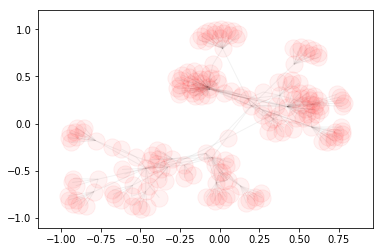

In [319]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(sub_grafo)
nx.draw_networkx(G, alpha=0.05, with_labels=False)
#plt.draw()
#plt.show()

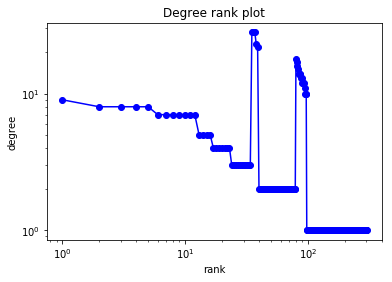

In [163]:
degree_sequence=sorted(np.array(nx.degree(G))[:,1],reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

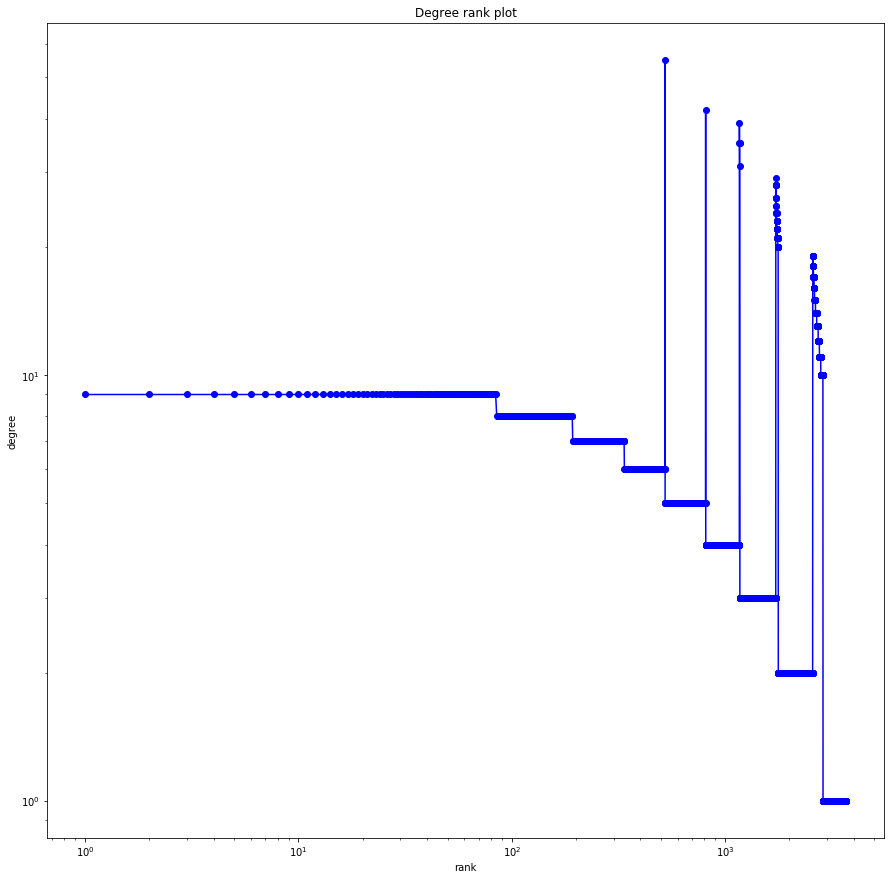

In [342]:
G = nx.Graph()
G.add_edges_from(lista_de_tuplas)
degree_sequence=sorted(np.array(nx.degree(G))[:,1],reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)
plt.figure(figsize=(15,15))

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

## Version Joaco

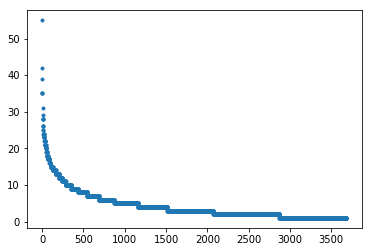

In [358]:
#Este grafico muestra los nodos pesados por degree. No es el punto 2 (màs abajo)
# Reducir el bineo de los histogramas

degrees = np.array(nx.degree(G))[:,1]
degrees
rango = range(0,len(degrees))
degrees = [int(d) for d in degrees]
degrees = sorted(degrees, reverse=True)
#plt.yscale('log')
plt.plot(rango, degrees,'.')

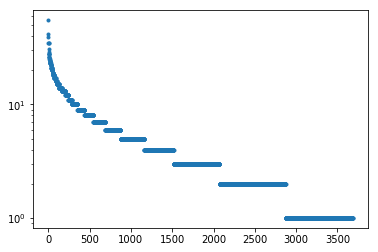

In [359]:
plt.clf()
plt.semilogy(rango, degrees, '.')
#plt.yscale('log')

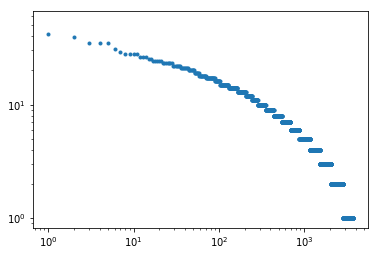

In [360]:
plt.clf()
plt.plot(rango, degrees,'.')
plt.yscale('log')
plt.xscale('log')

## Version histogramas

In [346]:
values, bins = np.histogram(co_autores_data.sum(axis=0))

In [347]:
values

array([3329,  265,   66,   15,    1,    2,    0,    4,    1,    1])

In [348]:
bins

array([   1. ,   17.6,   34.2,   50.8,   67.4,   84. ,  100.6,  117.2,
        133.8,  150.4,  167. ])

In [349]:
nuevos_bins = []
for i in range(0, len(bins)-1):
    bins_i = (bins[i] + bins[i + 1])/float(2)
    nuevos_bins.append(bins_i)

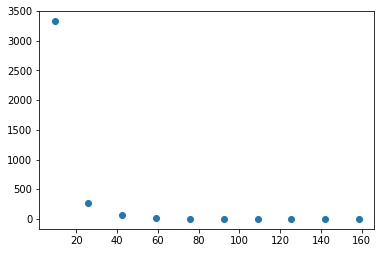

In [350]:
plt.plot(nuevos_bins, values, 'o')
plt.show()

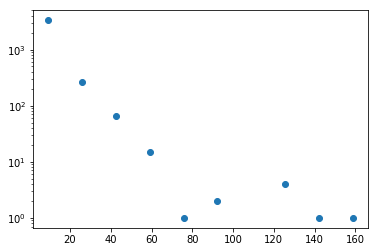

In [351]:
plt.clf()
plt.plot(nuevos_bins, values, 'o')
plt.yscale("log")
plt.show()

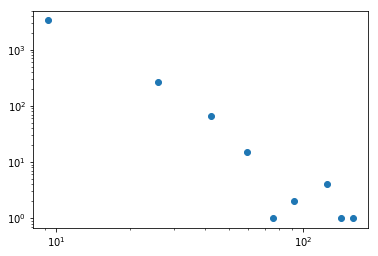

In [352]:
plt.clf()
plt.plot(nuevos_bins, values, 'o')
plt.yscale("log")
plt.xscale("log")
plt.show()

# componentes_conexas

In [353]:
componentes_conexas = list(nx.connected_components(G))

In [354]:
cardinal = [ len(l) for l in componentes_conexas]
print sum(cardinal)
maximo = max(cardinal)
maximo

3684


3046

# componente gigante

In [355]:
componenete_gigante = componentes_conexas[cardinal.index(maximo)]

In [356]:
len(obtener_subgrafo(lista_de_tuplas, "AOKI", 5))

2

In [357]:
len(lista_de_tuplas)

8113